In [111]:
import pandas as pd
import numpy as np

etf_info_path = "C:/Users/19712/Desktop/Berkeley MFE/Semester 4/IAQF/Final Pairs Eval/Pairs_Screen_Measures.csv"
df = pd.read_csv(etf_info_path)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20503 entries, 0 to 20502
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index 1                 20503 non-null  object 
 1   index 2                 20503 non-null  object 
 2   const                   20503 non-null  float64
 3   beta                    20503 non-null  float64
 4   trade_period            20503 non-null  int64  
 5   n_zero_cross            20503 non-null  int64  
 6   avg_distance            20503 non-null  float64
 7   coint                   20503 non-null  int64  
 8   coint_p_value           20503 non-null  float64
 9   mrk_eff_coef_1          20503 non-null  float64
 10  mrk_eff_coef_2          20503 non-null  float64
 11  Price to Book 1         20503 non-null  float64
 12  Price to Book 2         20503 non-null  float64
 13  Price to Book Corr      20503 non-null  float64
 14  Price to Earnings 1     20503 non-null

In [113]:
df.columns

Index(['index 1', 'index 2', 'const', 'beta', 'trade_period', 'n_zero_cross',
       'avg_distance', 'coint', 'coint_p_value', 'mrk_eff_coef_1',
       'mrk_eff_coef_2', 'Price to Book 1', 'Price to Book 2',
       'Price to Book Corr', 'Price to Earnings 1', 'Price to Earnings 2',
       'Price to Earnings Corr', 'Div Yield 1', 'Div Yield 2',
       'Div Yield Corr', 'Average Spread 1', 'Average Spread 2', 'AUM 1',
       'AUM 2', 'AUM ratio', 'Dollar Volume 1', 'Dollar Volume 2',
       'Dollar Volume ratio', 'percent_zero_cross'],
      dtype='object')

In [114]:
##Limit the universe to cointegrated pairs
df = df[df['coint'] == 1]

#Create the crossover rate function and normalize via sqrt
df['Crossover_Rate'] = df['n_zero_cross']/df['trade_period']

#Create the valuation ratio and normalize via log
df['Valuation Ratio'] = df['Price to Earnings 1']/df['Price to Earnings 2'] + df['Price to Book 1']/df['Price to Book 2'] + df['Div Yield 1']/df['Div Yield 2']
df['Valuation Ratio'] = df['Valuation Ratio']/3
df['Valuation Ratio'].clip(0, 100)

#Create a valuation correlation
df['Valuation Correlation'] = df[['Price to Book Corr', 'Price to Earnings Corr', 'Div Yield Corr']].mean(axis=1)

#Create average spread information
df['Average Spread'] = np.where(df['Average Spread 1'].isna() == True, df['Average Spread 2'], df['Average Spread 1'])



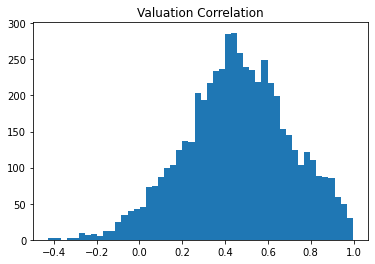

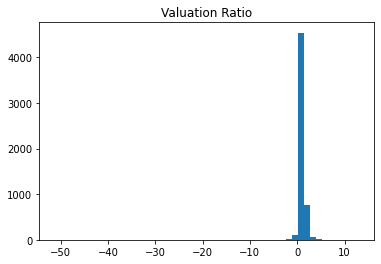

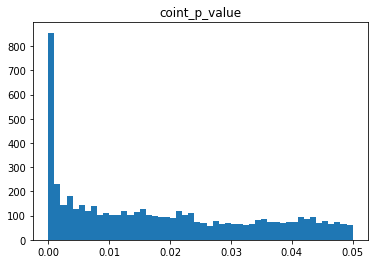

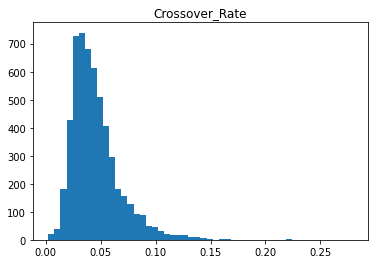

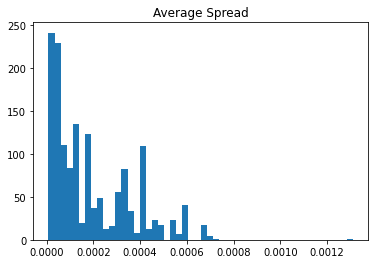

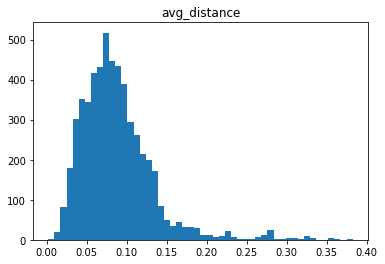

In [115]:
import matplotlib.pyplot as plt
for col in ['Valuation Correlation', 'Valuation Ratio', 'coint_p_value', 'Crossover_Rate', 'Average Spread', 'avg_distance']:
    plt.hist(df[col], bins = 50)
    plt.title(col)
    plt.show()

In [116]:
score_df = df[['index 1', 'index 2','Valuation Correlation', 'Valuation Ratio', 'coint_p_value', 'Crossover_Rate', 'Average Spread', 'avg_distance']]
score_df['Ticker_Pair'] = score_df['index 1'] + '_' + score_df['index 2']
score_df = score_df.drop(['index 1', 'index 2'], axis=1)
score_df = score_df.set_index(['Ticker_Pair'])
score_df.head()

C:\Users\19712\AppData\Local\Temp\ipykernel_12436\2611639083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df['Ticker_Pair'] = score_df['index 1'] + '_' + score_df['index 2']


,Valuation Correlation,Valuation Ratio,coint_p_value,Crossover_Rate,Average Spread,avg_distance
Ticker_Pair,,,,,,
*XCS_*XMD,0.567233,0.902672,0.024524,0.017033,NaN,0.057277
*XCS_B0M631,0.439967,1.257843,0.033946,0.055640,NaN,0.090019
*XCS_EEM,0.419767,1.270881,0.036301,0.053369,NaN,0.089028
*XCS_EWM,0.439500,1.018570,0.043901,0.031037,NaN,0.118687
*XCS_EZA,0.498233,1.013308,0.024047,0.060182,NaN,0.095128


In [117]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import quantile_transform
scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(2.0, 98.0), copy=True, unit_variance=True)


score_array = quantile_transform(score_df.values, n_quantiles=100, output_distribution='normal', random_state=0, copy=True)
score_df = pd.DataFrame(scaler.fit_transform(score_array), columns = score_df.columns, index =score_df.index)

#score_df.head()
score_df

,Valuation Correlation,Valuation Ratio,coint_p_value,Crossover_Rate,Average Spread,avg_distance
Ticker_Pair,,,,,,
*XCS_*XMD,0.428051,-0.733623,0.432281,-1.905929,NaN,-0.678182
*XCS_B0M631,-0.090161,0.554288,0.766968,0.705372,NaN,0.256471
*XCS_EEM,-0.177302,0.587145,0.889302,0.609210,NaN,0.229653
*XCS_EWM,-0.092061,-0.231955,1.418309,-0.574991,NaN,0.931845
*XCS_EZA,0.152286,-0.254174,0.410500,0.873028,NaN,0.399171
...,...,...,...,...,...,...
INDY_MCHI,-0.317650,0.951957,0.308056,-1.575729,0.344404,-0.321916
INDY_B6R522,0.380595,0.048114,-0.000599,0.795981,NaN,-0.731670
INDY_B4L60Z,0.289985,-0.036585,-0.564137,1.461162,NaN,-1.000153


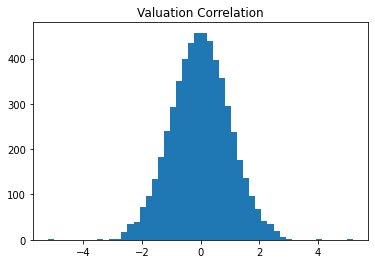

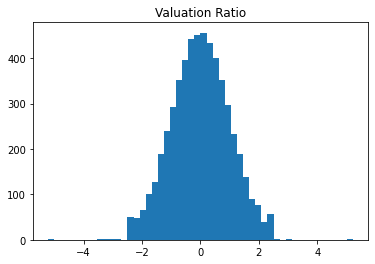

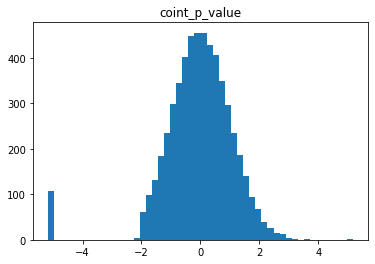

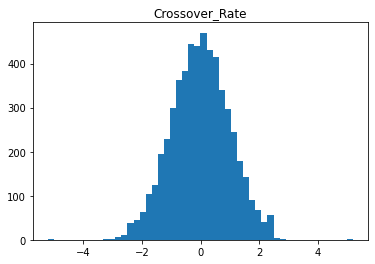

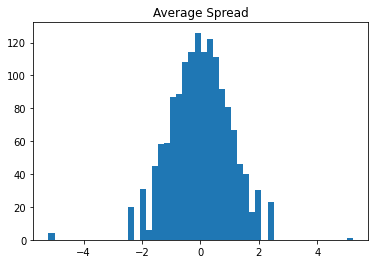

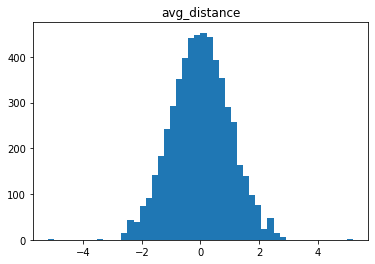

In [118]:
for col in score_df.columns:
    plt.hist(score_df[col], bins = 50)
    plt.title(col)
    plt.show()

In [119]:
#Combine the values
score_df = score_df.dropna()
score_df['Final_Value'] = score_df[['Valuation Correlation', 'Valuation Ratio']].mean(axis=1)
score_df = score_df.drop(['Valuation Correlation', 'Valuation Ratio'], axis=1)
score_df['Final_Value'] = score_df.mean(axis=1)

C:\Users\19712\AppData\Local\Temp\ipykernel_12436\187203764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df['Final_Value'] = score_df[['Valuation Correlation', 'Valuation Ratio']].mean(axis=1)


In [120]:
score_df = score_df.sort_values(['Final_Value'], ascending = False)
selected_pairs = pd.DataFrame(score_df.iloc[0:20].index.to_list(), columns = ['Ticker Pair'])

#### Building the Initial Pairs DataFrame


In [121]:
features = pd.read_csv("C:/Users/19712/Desktop/Berkeley MFE/Semester 4/IAQF/ETF_Screen_Information_2023_02_09.csv")


In [122]:
search_tickers = []
for pair in selected_pairs['Ticker Pair'].to_list():
    pair_split = pair.split('_')
    search_tickers.append(pair_split[0])
    search_tickers.append(pair_split[1])
    
search_tickers = list(set(search_tickers))

#First, produce a dataframe of all the
price_df = features[['Date', 'ETF_Ticker', 'ETF Price']]
price_df = price_df.set_index(['ETF_Ticker'])
price_df = price_df.loc[search_tickers]
price_df.to_csv('C:/Users/19712/Desktop/Berkeley MFE/Semester 4/IAQF/price_df.csv')

In [123]:
#Build specific features for the pairs

def feature_generator_ratio(ticker1, ticker2, features):
    iter_df = features.set_index(['ETF_Ticker'])
    iter_df = iter_df.loc[[ticker1, ticker2]]
    iter_df = iter_df[['Date', 'Div Yield', 'Price to Book', 'Price to Earnings']]
    iter_df = iter_df.sort_values('Date')
    
    #Divide the dfs
    iter_1  = iter_df.loc[ticker1].reset_index().set_index(['Date']).drop(['ETF_Ticker'],axis=1)
    iter_2 = iter_df.loc[ticker2].reset_index().set_index(['Date']).drop(['ETF_Ticker'],axis=1)
    iter_df = iter_1.divide(iter_2)
    
    return iter_df

def period_returns(ticker1, ticker2, features):
    iter_df = features.set_index(['ETF_Ticker'])
    iter_df = iter_df.loc[[ticker1, ticker2]]
    iter_df = iter_df[['Date', 'Total Return']]
    iter_df = iter_df.sort_values('Date')
    
    iter_1_ret = iter_df.loc[ticker1].reset_index().set_index(['Date']).drop(['ETF_Ticker'],axis=1)
    iter_2_ret = iter_df.loc[ticker2].reset_index().set_index(['Date']).drop(['ETF_Ticker'],axis=1)
    
    #Calculate daily trailing returns
    iter_1_ret['Total_Ret_Pct_1'] = iter_1_ret['Total Return'].pct_change(periods=1)
    iter_2_ret['Total_Ret_Pct_1'] = iter_2_ret['Total Return'].pct_change(periods=1)
    iter_1_ret['Total_Ret_Pct_5'] = iter_1_ret['Total Return'].pct_change(periods=5)
    iter_2_ret['Total_Ret_Pct_5'] = iter_2_ret['Total Return'].pct_change(periods=5)
    iter_1_ret['Total_Ret_Pct_21'] = iter_1_ret['Total Return'].pct_change(periods=21)
    iter_2_ret['Total_Ret_Pct_21'] = iter_2_ret['Total Return'].pct_change(periods=21)
    iter_1_ret['Total_Ret_Pct_63'] = iter_1_ret['Total Return'].pct_change(periods=63)
    iter_2_ret['Total_Ret_Pct_63'] = iter_2_ret['Total Return'].pct_change(periods=63)
    iter_1_ret['Total_Ret_Pct_252'] = iter_1_ret['Total Return'].pct_change(periods=252)
    iter_2_ret['Total_Ret_Pct_252'] = iter_2_ret['Total Return'].pct_change(periods=252)
    
    #Calculate fwd daily trailing returns
    iter_1_ret['Y_Fwd_Total_Ret_Pct_1'] = iter_1_ret['Total Return'].pct_change(periods=-1)
    iter_2_ret['Y_Fwd_Total_Ret_Pct_1'] = iter_2_ret['Total Return'].pct_change(periods=-1)
    iter_1_ret['Y_Fwd_Total_Ret_Pct_5'] = iter_1_ret['Total Return'].pct_change(periods=-5)
    iter_2_ret['Y_Fwd_Total_Ret_Pct_5'] = iter_2_ret['Total Return'].pct_change(periods=-5)
    
    iter_df = iter_1_ret.subtract(iter_2_ret).round(4).drop(['Total Return'], axis=1)
    
    return iter_df

def build_feature_df(ticker_list, features):
    container_df = pd.DataFrame()
    
    for ticker_pair in ticker_list:
        ticker_split = ticker_pair.split('_')
        val_df = feature_generator_ratio(ticker_split[0], ticker_split[1], features)
        ret_df = period_returns(ticker_split[0], ticker_split[1], features)
        feature_df = val_df.join(ret_df).reset_index()
        feature_df['Ticker_Pair'] = ticker_split[0] +'_'+ticker_split[1]
        container_df = pd.concat([container_df, feature_df])
        
    return container_df

final_training_df = build_feature_df(selected_pairs['Ticker Pair'].to_list(), features)

In [124]:
final_training_df.describe()

,Div Yield,Price to Book,Price to Earnings,Total_Ret_Pct_1,Total_Ret_Pct_5,Total_Ret_Pct_21,Total_Ret_Pct_63,Total_Ret_Pct_252,Y_Fwd_Total_Ret_Pct_1,Y_Fwd_Total_Ret_Pct_5
count,74739.000000,74739.000000,74739.000000,74719.000000,74639.000000,74319.000000,73479.000000,69699.000000,74719.000000,74639.000000
mean,1.182950,2.097368,3.162288,0.000165,0.000699,0.002742,0.008500,0.032640,-0.000104,-0.000620
std,2.364355,1.081277,50.709582,0.014172,0.025673,0.048054,0.081134,0.162372,0.014208,0.026133
min,0.135484,0.291372,-91.219132,-0.293200,-0.299700,-0.319300,-0.474200,-0.746800,-0.306100,-0.298000
25%,0.507248,1.352127,0.856736,-0.006300,-0.012300,-0.023200,-0.037900,-0.062400,-0.006500,-0.013700
50%,0.651010,1.956663,1.163495,0.000200,0.000800,0.003000,0.009300,0.039700,-0.000200,-0.000800
75%,1.014639,2.665324,1.554612,0.006500,0.013700,0.029000,0.055200,0.128400,0.006300,0.012300
max,34.308978,7.437894,1830.628960,0.443300,0.394300,0.364700,0.538000,1.284400,0.419200,0.410000


In [125]:
final_training_df.to_csv('C:/Users/19712/Desktop/Berkeley MFE/Semester 4/IAQF/Example_Training_df.csv')

In [126]:
final_training_df.corr()

,Div Yield,Price to Book,Price to Earnings,Total_Ret_Pct_1,Total_Ret_Pct_5,Total_Ret_Pct_21,Total_Ret_Pct_63,Total_Ret_Pct_252,Y_Fwd_Total_Ret_Pct_1,Y_Fwd_Total_Ret_Pct_5
Div Yield,1.000000,-0.276853,-0.012299,-0.009163,-0.019005,-0.035952,-0.048478,-0.091686,-0.000103,0.005299
Price to Book,-0.276853,1.000000,0.007978,0.024954,0.054130,0.110131,0.183109,0.337728,-0.001543,-0.017197
Price to Earnings,-0.012299,0.007978,1.000000,0.006170,0.018727,-0.005490,-0.018801,-0.029264,-0.003597,-0.007218
Total_Ret_Pct_1,-0.009163,0.024954,0.006170,1.000000,0.420674,0.225312,0.119811,0.053996,0.192420,0.125112
Total_Ret_Pct_5,-0.019005,0.054130,0.018727,0.420674,1.000000,0.475441,0.259019,0.113418,0.124172,0.102370
Total_Ret_Pct_21,-0.035952,0.110131,-0.005490,0.225312,0.475441,1.000000,0.540580,0.225828,0.060830,0.041577
Total_Ret_Pct_63,-0.048478,0.183109,-0.018801,0.119811,0.259019,0.540580,1.000000,0.394535,0.035155,0.020758
Total_Ret_Pct_252,-0.091686,0.337728,-0.029264,0.053996,0.113418,0.225828,0.394535,1.000000,0.022386,0.025478
Y_Fwd_Total_Ret_Pct_1,-0.000103,-0.001543,-0.003597,0.192420,0.124172,0.060830,0.035155,0.022386,1.000000,0.424280
Y_Fwd_Total_Ret_Pct_5,0.005299,-0.017197,-0.007218,0.125112,0.102370,0.041577,0.020758,0.025478,0.424280,1.000000


In [130]:
final_training_df['Ticker_Pair'].value_counts()

IMCB_ACWX    4303
SUSA_WPS     4303
EWD_ISCV     4303
ILCG_ACWX    4303
IUSV_WPS     4303
EWZ_ACWI     4303
EZA_IHF      4303
EWT_ILCV     4303
IUSG_WOOD    4303
IHE_ACWX     4201
IHE_WPS      4201
IHE_SCZ      4201
IHE_WOOD     4201
IHE_EWW      4201
EXI_WPS      4115
EXI_ACWX     4115
DSI_WPS      4073
REZ_WPS      3950
TOK_WOOD     3781
EIS_INDY     3741
Name: Ticker_Pair, dtype: int64